# DATA SCIENCE SESSIONS VOL. 3
### A Foundational Python Data Science Course
## Session 06: Exploratory Data Analysis - EDA

[&larr; Back to course webpage](https://datakolektiv.com/)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SESSIONS VOL. 3 :: A Foundational Python Data Science Course.

![](../img/IntroRDataScience_NonTech-1.jpg)

### Lecturers

[Goran S. Milovanović, PhD, DataKolektiv, Chief Scientist & Owner](https://www.linkedin.com/in/gmilovanovic/)

[Aleksandar Cvetković, PhD, DataKolektiv, Consultant](https://www.linkedin.com/in/alegzndr/)

[Ilija Lazarević, MA, DataKolektiv, Consultant](https://www.linkedin.com/in/ilijalazarevic/)

![](../img/DK_Logo_100.png)

***

### 0. What do we want to do today?

Our goal in **Session06** is to learn how to perform exploratory data analysis. We will:
- load the data,
- inspect the nature of the data,
- use charts of different kind for representing data graphically,
- make some conclusions based on the previous steps.

### 1. Where am I?

Your are (or you should be...) in the `session06` directory, where we find 
- this notebook, 
- it's HTML version, 
- another directory `_data` that contains CSV files.

In [1]:
import os

work_dir = os.getcwd()
print(work_dir)
print(os.listdir(work_dir))
data_dir = os.path.join(work_dir, "_data")
os.listdir(data_dir)

/home/ikacikac/workspace/dss03python2023/session06
['dss03_py_session06_b.ipynb', '_img', 'dss03_py_session06.ipynb', '_data']


['airports.csv', 'planes.csv', 'weather.csv', 'flights.csv', 'airlines.csv']

### Load the libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

Today we are working with nycflights13 dataset. It consists of data about flights that departed NYC in 2013.

Also includes useful 'metadata' on airlines, airports, weather, and planes, but we will be using these on second part of todays lectures, i.e. sesssion07.

First things first. We shall start with loading the flights data, and inspecting the data.

In [3]:
df = pd.read_csv('_data/flights.csv', index_col=0)

df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


#### Columns (features) description

- **year, month, day** - Date of departure.
- **dep_time, arr_time** - Actual departure and arrival times (format HHMM or HMM), local tz.
- **sched_dep_time, sched_arr_time** - Scheduled departure and arrival times (format HHMM or HMM), local tz.
- **dep_delay, arr_delay** - Departure and arrival delays, in minutes. Negative times represent early departures/arrivals.
- **carrier** - Two letter carrier abbreviation. See airlines to get name.
- **flight** - Flight number.
- **tailnum** - Plane tail number. See planes for additional metadata.
- **origin, dest** - Origin and destination. See airports for additional metadata.
- **air_time** - Amount of time spent in the air, in minutes.
- **distance** - Distance between airports, in miles.
- **hour, minute** - Time of scheduled departure broken into hour and minutes.
- **time_hour** - Scheduled date and hour of the flight as a POSIXct date. Along with origin, can be used to join flights data to weather data.

What is POSIXct date format? 
> POSIXct stores date and time in seconds with the number of seconds beginning at 1 January 1970. Negative numbers are used to store dates prior to 1970. Thus, the POSIXct format stores each date and time as a single value in units of seconds.

Now that we have the overview, we want to check the data for missing values.

### Cleaning the data

In [4]:
(df.isna()
   .sum()
   .reset_index()
   .rename(columns={'index': 'feature', 0: 'no_nulls'})
   .sort_values('no_nulls', ascending=False)
   .assign(perc_nulls = lambda x: x['no_nulls'] / len(df) * 100))

,feature,no_nulls,perc_nulls
8,arr_delay,9430,2.800081
14,air_time,9430,2.800081
6,arr_time,8713,2.587180
3,dep_time,8255,2.451184
5,dep_delay,8255,2.451184
11,tailnum,2512,0.745896
0,year,0,0.000000
12,origin,0,0.000000
17,minute,0,0.000000
16,hour,0,0.000000


Interesting! This gives us some idea on where we have missing values. From here, you can either decide to just discard these, or go to investigate and maybe impute the data yourself. In case percentage of missing data is very low, like in our case, you may opt to discarding these right away. However, you should be careful with discarding because these percentages show you just a part of the picture. What do we mean? Let's view couple of examples.

First, let's look at the visualizations of our missing data.

![](_img/missing_data_example_a.png)

Here, black lines are missing values for each column. This also gives you the part of the picture. Let's group flights with missing values for columns, and display only columns that have missing values.

![](_img/missing_data_example_b.png)

Based on this view, you can be sure that discarding flights with missing values will remove just a small portion of flights from the original data set.

The scenario could easily be where missing value cells are not so neatly grouped. Look at this example:

![](_img/missing_data_example_c.png)

And let's do the same thing as with our data.

![](_img/missing_data_example_d.png)

What will happen if we discard all flights with missing values, with `pd.dropna()`? Yes, we will discard more than half of our data. This is not a good start. 

Conclusion is to really pay attention to the missing values and be very careful in discarding them.

But how does Pandas handle missing values. Did we mention `None` value in Python? 

In [5]:
type(None)

NoneType

Python has it's own way of handling missing value. NumPy too. And Pandas uses NumPy for `pd.Series` values. And `pd.DataFrame` uses `pd.Series` for storing column values. So, we have to go to NumPy to see what is happening.

NumPy library has 3 different variables that are used for marking missing values (Not A Number - NAN). These are all of `float` type.

In [6]:
type(np.NaN), type(np.NAN), type(np.nan)

(float, float, float)

If we try to compare 'nothing' with 'nothing' we get `False`. This should make sense.

In [7]:
np.NaN == np.nan

False

But if we try to see if they are the same objects, we see that they are. This should also make sense.

In [8]:
(np.NaN is np.nan, 
 np.NaN is np.NAN,  
 np.NAN is np.nan)

(True, True, True)

Why was this so important. Because when NumPy treats `NaN` values as `float`, then columns that should by its nature be of type `int`, but have missing values, are treated as `float`. This is the reason why columns that should be of type `int` and have missing value are treated as `float`. Check it out:  

In [9]:
null_columns = df.isna().sum().where(lambda x: x > 0).dropna().index.to_list()

In [10]:
df[null_columns].head()

,dep_time,dep_delay,arr_time,arr_delay,tailnum,air_time
1,517.0,2.0,830.0,11.0,N14228,227.0
2,533.0,4.0,850.0,20.0,N24211,227.0
3,542.0,2.0,923.0,33.0,N619AA,160.0
4,544.0,-1.0,1004.0,-18.0,N804JB,183.0
5,554.0,-6.0,812.0,-25.0,N668DN,116.0


In [11]:
df[null_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 1 to 336776
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   dep_time   328521 non-null  float64
 1   dep_delay  328521 non-null  float64
 2   arr_time   328063 non-null  float64
 3   arr_delay  327346 non-null  float64
 4   tailnum    334264 non-null  object 
 5   air_time   327346 non-null  float64
dtypes: float64(5), object(1)
memory usage: 18.0+ MB


Okay. Enough with this. Let's just drop flights that have missing values in any of the columns. We should be fine with this approach.

In [12]:
df = df.dropna()

In [13]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 1 to 336770
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            327346 non-null  int64  
 1   month           327346 non-null  int64  
 2   day             327346 non-null  int64  
 3   dep_time        327346 non-null  float64
 4   sched_dep_time  327346 non-null  int64  
 5   dep_delay       327346 non-null  float64
 6   arr_time        327346 non-null  float64
 7   sched_arr_time  327346 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         327346 non-null  object 
 10  flight          327346 non-null  int64  
 11  tailnum         327346 non-null  object 
 12  origin          327346 non-null  object 
 13  dest            327346 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        327346 non-null  int64  
 16  hour            327346 non-null  int64  
 17  minute    

Pandas DataFrame has great method for trying to correctly recognize column data types. It is called `convert_dtypes`. Let's see what is the result.

In [15]:
df = df.convert_dtypes()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 1 to 336770
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   year            327346 non-null  Int64 
 1   month           327346 non-null  Int64 
 2   day             327346 non-null  Int64 
 3   dep_time        327346 non-null  Int64 
 4   sched_dep_time  327346 non-null  Int64 
 5   dep_delay       327346 non-null  Int64 
 6   arr_time        327346 non-null  Int64 
 7   sched_arr_time  327346 non-null  Int64 
 8   arr_delay       327346 non-null  Int64 
 9   carrier         327346 non-null  string
 10  flight          327346 non-null  Int64 
 11  tailnum         327346 non-null  string
 12  origin          327346 non-null  string
 13  dest            327346 non-null  string
 14  air_time        327346 non-null  Int64 
 15  distance        327346 non-null  Int64 
 16  hour            327346 non-null  Int64 
 17  minute          327346 non-nu

Voila. Once we removed `NaN` values, Pandas recognizes all of the numeric columns as `int` data type. Also, columns with `object` type are now of `string` type. 

In [16]:
df.select_dtypes('int64').head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
1,2013,1,1,517,515,2,830,819,11,1545,227,1400,5,15
2,2013,1,1,533,529,4,850,830,20,1714,227,1416,5,29
3,2013,1,1,542,540,2,923,850,33,1141,160,1089,5,40
4,2013,1,1,544,545,-1,1004,1022,-18,725,183,1576,5,45
5,2013,1,1,554,600,-6,812,837,-25,461,116,762,6,0


What can de conclude based on this subset of "integer" columns?

Well, here is what we can see:
- `year`, `month`, `day`, `hour` and `minute` are surely integers, but there is hardly any point in doing arithmetic operations with them. These are not categorical too. Maybe we can observe them as ordinal type variables?
- `sched_dep_time` and `sched_arr_time` have specific format i.e. HHMM or HMM, and are not to be viewed as integers. Very specific format, we have to deal with this somehow.
- `flight` is the number of flight. This should be nominal (categorical) variable or just string.

- `dep_delay` is the delay in minutes. We can use this as is.
- `air_time` is, as the name says, airplane air time, in minutes.
- `dep_time` and `arr_time` are of same format as `sched_dep_time` and `sched_arr_time`. We have to deal with these properly.

What `dep_time` and `arr_time` actually stands for? 

> The **departure time** is the moment that your plane **pushes back from the gate**, not the time it takes off. 

> The **arrival time** is the moment that your plane **pulls into the gate**, not the time it touches down on the runway. 

Let's look at the columns of `string` type.

In [17]:
df.select_dtypes('string')

,carrier,tailnum,origin,dest,time_hour
1,UA,N14228,EWR,IAH,2013-01-01 05:00:00
2,UA,N24211,LGA,IAH,2013-01-01 05:00:00
3,AA,N619AA,JFK,MIA,2013-01-01 05:00:00
4,B6,N804JB,JFK,BQN,2013-01-01 05:00:00
5,DL,N668DN,LGA,ATL,2013-01-01 06:00:00
...,...,...,...,...,...
336766,B6,N354JB,JFK,SYR,2013-09-30 22:00:00
336767,B6,N281JB,JFK,BUF,2013-09-30 22:00:00
336768,B6,N346JB,JFK,ROC,2013-09-30 22:00:00
336769,B6,N565JB,JFK,BOS,2013-09-30 22:00:00


Okay, this mostly makes sense, except this `time_hour` column. We already said this is special column for joining the rest of the data, stored in other CSV files in `_data` folder. What is the good thing with Pandas is that it can parse this as date/time very easy. Let's just give it a quick demo:

In [18]:
_time_hour = pd.to_datetime(df['time_hour'])

_time_hour

1        2013-01-01 05:00:00
2        2013-01-01 05:00:00
3        2013-01-01 05:00:00
4        2013-01-01 05:00:00
5        2013-01-01 06:00:00
                 ...        
336766   2013-09-30 22:00:00
336767   2013-09-30 22:00:00
336768   2013-09-30 22:00:00
336769   2013-09-30 22:00:00
336770   2013-09-30 23:00:00
Name: time_hour, Length: 327346, dtype: datetime64[ns]

Okay, big deal. What is the benefit of this? Well, you can work with this in very interesting way.

In [19]:
_time_hour.dt.hour.head()

1    5
2    5
3    5
4    5
5    6
Name: time_hour, dtype: int64

In [20]:
_time_hour.dt.year.head()

1    2013
2    2013
3    2013
4    2013
5    2013
Name: time_hour, dtype: int64

In [21]:
_time_hour.dt.strftime('%Y-%m-%d').head()

1    2013-01-01
2    2013-01-01
3    2013-01-01
4    2013-01-01
5    2013-01-01
Name: time_hour, dtype: object

In [22]:
_time_hour.dt.strftime('%H-%M-%S').head()

1    05-00-00
2    05-00-00
3    05-00-00
4    05-00-00
5    06-00-00
Name: time_hour, dtype: object

In [23]:
(_time_hour - pd.Timedelta('10 days')).head()

1   2012-12-22 05:00:00
2   2012-12-22 05:00:00
3   2012-12-22 05:00:00
4   2012-12-22 05:00:00
5   2012-12-22 06:00:00
Name: time_hour, dtype: datetime64[ns]

Working with date and time is for the separate course on itself. This was just a small showoff just for you to get the feel of what you can do with datetime type of column.

Ok, let's get back to our data set. Let's refresh our memory of the data set content.

In [24]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00


Let's do some column data type conversion. Remember, some of the columns are mistakenly "recognized" as numeric type and should be converted to either string (object) or category.

In [25]:
# df.loc[:, 'flight'] = df.loc[:, 'flight'].astype('object')

In [26]:
df = df.astype({'flight': 'string'})

In [27]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 1 to 336770
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   year            327346 non-null  Int64 
 1   month           327346 non-null  Int64 
 2   day             327346 non-null  Int64 
 3   dep_time        327346 non-null  Int64 
 4   sched_dep_time  327346 non-null  Int64 
 5   dep_delay       327346 non-null  Int64 
 6   arr_time        327346 non-null  Int64 
 7   sched_arr_time  327346 non-null  Int64 
 8   arr_delay       327346 non-null  Int64 
 9   carrier         327346 non-null  string
 10  flight          327346 non-null  string
 11  tailnum         327346 non-null  string
 12  origin          327346 non-null  string
 13  dest            327346 non-null  string
 14  air_time        327346 non-null  Int64 
 15  distance        327346 non-null  Int64 
 16  hour            327346 non-null  Int64 
 17  minute          327346 non-nu

Let's quickly see if there are duplicate rows. This is is also very important.

In [29]:
df.duplicated().any()

False

Now we are ready to do some data exploration!

### Data Exploration

We already had some practice with visualizing the data from `pd.DataFrame`. Remember:

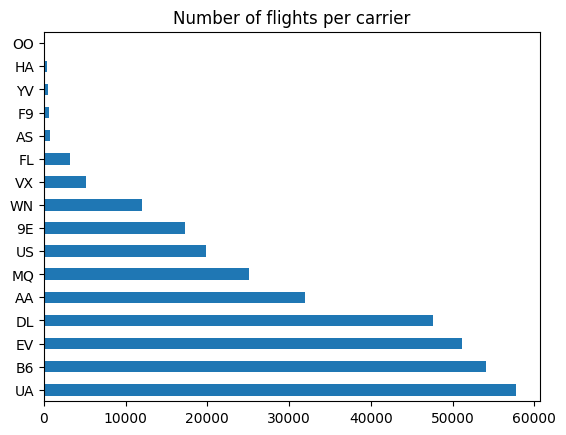

In [30]:
df['carrier'].value_counts().plot(kind='barh', title='Number of flights per carrier');

Even though this approach is quick and easy, it is used mostly for simple visuals. It also uses `matplotlib` library for drawing the elements on the image.

There are many ways you can use `matplotlib` and draw desired visuals, and also many libraries that use `matplotlib` as a base, while adding more user friendly methods. One of which is `seaborn` that we are going to use too. 

But first, let's discuss some beginner steps with using `matplotlib`.

When trying to draw (plot) a chart using `matplotlib`, everything is organized in one `Figure`. There are many parts of the figure, and most important ones are depicted on the next image (officialy from `matplotlib` site):

![](matplotlib_figure_parts.png)

Nothing beats practice. Let's plot the example of exponential function.

In [31]:
x = np.linspace(0, 50, 101)
y = x**2

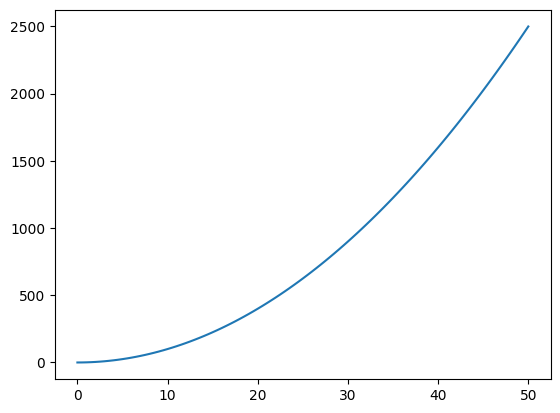

In [32]:
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show();

Can we do it even simpler? Yes!

/tmp/ipykernel_171625/83080198.py:2: RuntimeWarning: divide by zero encountered in log
  ax.plot(x, np.log(x))


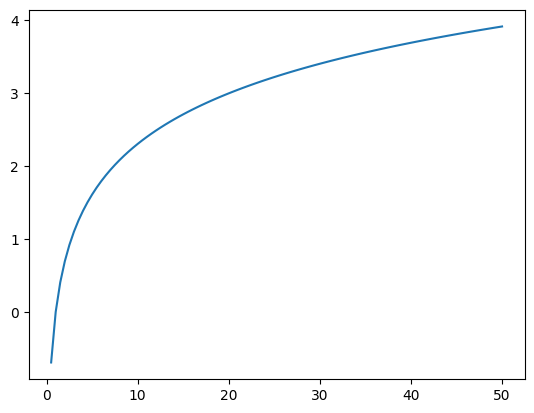

In [33]:
fig, ax = plt.subplots()
ax.plot(x, np.log(x))
plt.show();

Watch out! `log(0)` is undefined. Make sure of what you are doing. 

What about if `x` is in range (-50, 50)?

And what if we ommit calling `plt.show()`? 

In [34]:
x = np.linspace(-50, 50, 100)

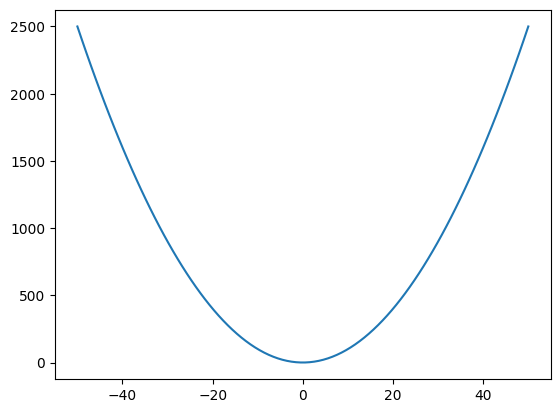

In [35]:
fig, ax = plt.subplots()

ax.plot(x, x**2);

From these examples it is evident that:
- we first have to create `Figure` and the `Axes` objects. Figure holds every part of the drawing. 
- `Axes` holds every part of the graph (charting area), and this includes "coordinate system", multiple `Axis` (2, 3), x and y labels, ticks, grid, etc.
- We use `ax` instance of `Axes` object, and call it's `plot` method that is plotting the line of our function.


![](matplotlib_figure_parts.png)

Like the official `matplotlib` figure shows:
- `Axis` are what defines "coordinate" system. Most of the time we will be working with 2D charts, so we will have X and Y axis.
- `Axis` hold axis labels, minor and major ticks.
- `Axis` also has it's title, legend, grid and spines.


Let's see how this is plotted and let's use our data.

In [36]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00


Let's plot the number of flights per each carrier.

In [37]:
_df = df['carrier'].value_counts().reset_index().rename(columns={'index': 'carrier', 'carrier': 'no_of_flights'})

_df 

,carrier,no_of_flights
0,UA,57782
1,B6,54049
2,EV,51108
3,DL,47658
4,AA,31947
5,MQ,25037
6,US,19831
7,9E,17294
8,WN,12044
9,VX,5116


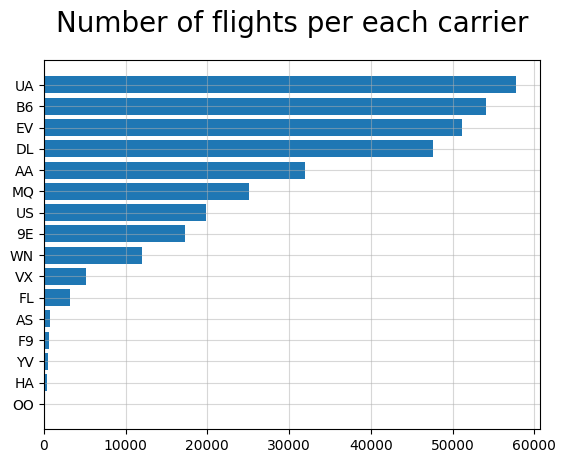

In [38]:
fig, ax = plt.subplots()
ax.barh(y='carrier', width='no_of_flights', data=_df)
ax.set_title('Number of flights per each carrier', size=20, pad=20)
ax.grid(alpha=.5)
ax.invert_yaxis() # attention!


But what about if we want to plot bars vertically? Not a problem. It is easy, just pay attention to change the arguments accordingly.

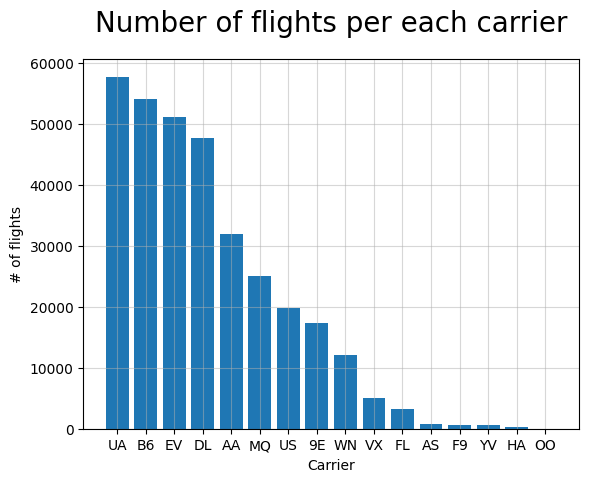

In [39]:
fig, ax = plt.subplots()
ax.bar(x='carrier', height='no_of_flights', data=_df)
ax.set_title('Number of flights per each carrier', size=20, pad=20)
ax.grid(alpha=.5)
ax.set_xlabel('Carrier')
ax.set_ylabel('# of flights');


In [40]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00


Let's now show the descriptive statistis for columns where this makes sense.

These are `air_time`, `distance`, `dep_delay`, `arr_delay`

In [41]:
df[['air_time', 'distance', 'dep_delay', 'arr_delay']].describe()

,air_time,distance,dep_delay,arr_delay
count,327346.000000,327346.000000,327346.000000,327346.000000
mean,150.686460,1048.371314,12.555156,6.895377
std,93.688305,735.908523,40.065688,44.633292
min,20.000000,80.000000,-43.000000,-86.000000
25%,82.000000,509.000000,-5.000000,-17.000000
50%,129.000000,888.000000,-2.000000,-5.000000
75%,192.000000,1389.000000,11.000000,14.000000
max,695.000000,4983.000000,1301.000000,1272.000000


If you remember, we already used **box plots** for depicting some of these descriptive statistics. Let's use it for `air_time`.

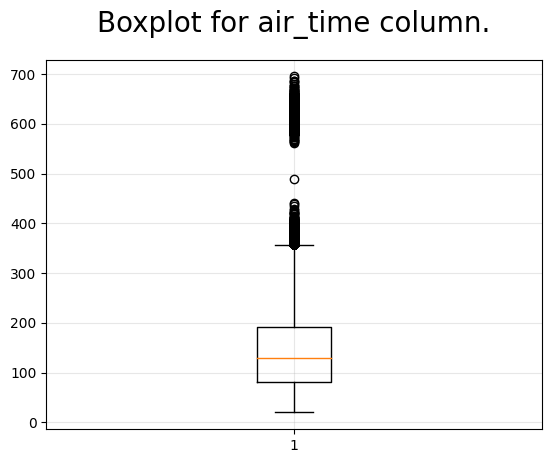

In [42]:
fig, ax = plt.subplots()

ax.boxplot(df['air_time']);
ax.grid(alpha=.3)
ax.set_title('Boxplot for air_time column.', size=20, pad=20);

What about we draw it horizontally, and make figure a bit wider?

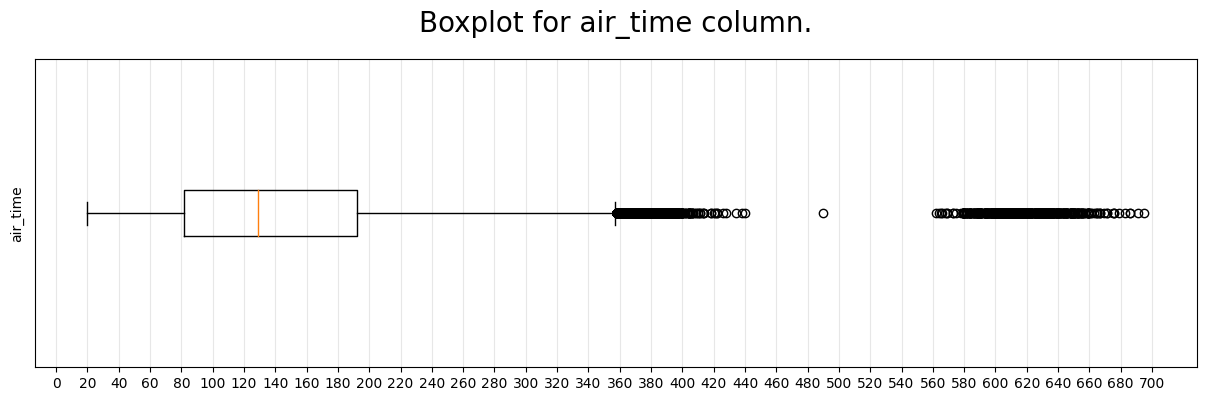

In [43]:
fig, ax = plt.subplots(figsize=(15, 4))

ax.boxplot(df['air_time'], vert=False);
ax.grid(alpha=.3)
ax.set_title('Boxplot for air_time column.', size=20, pad=20)
ax.set_xticks(np.arange(0, df.air_time.max()+20, 20));
ax.set_ylabel('air_time')
ax.set_yticks([]);

In [44]:
df.air_time.describe()

count    327346.000000
mean        150.686460
std          93.688305
min          20.000000
25%          82.000000
50%         129.000000
75%         192.000000
max         695.000000
Name: air_time, dtype: float64

Let's go over each of these:
- count speaks for itself,
- mean is the arithmetic mean of the values in `air_time` column. It's the sum of all values divided by the count.

In [45]:
df.air_time.sum() / len(df)

150.68646019807787

- std is standard deviation of the sample (our data is just the sample!).


Remember, the standard deviation is the measure of dispersion and for the population is:

$$\sigma = \sqrt{\frac{\sum_{i=1}^{n}{(x_i - \mu)^2}}{n}}$$

where $\mu$ is the population mean, n is the population size.

However the standard deviation for the sample is:

$$\sigma = \sqrt{\frac{\sum_{i=1}^{N}{(x_i - M)^2}}{N - 1}}$$

where M is the sample mean, and N is the sample size.

In [46]:
def sample_dispersion(values, correction=True):
    nominator = np.sum((values - np.mean(values))**2)
    if correction is True:
        denominator = len(values) - 1
    else:
        denominator = len(values)
    return np.sqrt(nominator/denominator)

In [47]:
df.air_time.describe()

count    327346.000000
mean        150.686460
std          93.688305
min          20.000000
25%          82.000000
50%         129.000000
75%         192.000000
max         695.000000
Name: air_time, dtype: float64

In [48]:
sample_dispersion(df.air_time, correction=True)

93.6883046590099

In [49]:
np.std(df.air_time)

93.68816155602985

In [50]:
sample_dispersion(df.air_time, correction=False)

93.68816155602985

In [51]:
np.std(df.air_time, ddof=0)

93.68816155602985

The **N-1** in denominator is the correction. You can interpret it in couple of ways. Simple one would be that we introduce penalty for small samples. More rigorous interpretation is related to standard deviation being biased if just **N** is used. This has to do with degrees of freedom. And this is exactly what we have been tweaking with `ddof` parameter in `np.std`. Pay attention, Pandas `describe` method is taking this correction into account when producting value for standard deviation of our sample. 

The rest of the descriptive statistics is:
- `min` and `max`, which is obvious, and
- quartiles given with `25%`, `50%` and `75%`.

Okay, so to start talking about quartiles, we shall first go into explaining what quantiles are.

Quantiles are values that split sorted data or a probability distribution into equal parts.

 The most commonly used quantiles have special names:
- **Quartiles (4-quantiles)**: Three quartiles split the data into four parts.
- **Deciles (10-quantiles)**: Nine deciles split the data into 10 parts.
- **Percentiles (100-quantiles)**: 99 percentiles split the data into 100 parts.

So, quartiles divide numerical data into 4 quarters, so that each quarter is the same size. 
- 1st quartile's value divides data so that it is bigger than 25% of data and smaller from 75%. 
- 2nd quartile divides data into equal parts (50% or the median). 
- 3rd quartile divides data so that 75% of the data is smaller and 25% of the data is bigger in value from it.


Let's say you have an array of values:

In [52]:
_arr = np.array([1,2,5,6,4,2,6,7,10,3])

How do we get quartiles? We use NumPy's `quantile` method. Second argument is the list are the splitting points. Let's see the example:

In [53]:
np.quantile(_arr, q=[.25, .5, .75])

array([2.25, 4.5 , 6.  ])

Why this is so important? Well, there are 3 main measures of central tendency:
- mean,
- median,
- mode.

Each of these gives just a part of the perspective when looking at the distribution of the data.

Let's go back to our `air_time` and see the values of these measures.

In [54]:
df.air_time.describe()

count    327346.000000
mean        150.686460
std          93.688305
min          20.000000
25%          82.000000
50%         129.000000
75%         192.000000
max         695.000000
Name: air_time, dtype: float64

In [55]:
_air_time_mean = np.mean(df.air_time)
_air_time_median = np.median(df.air_time)

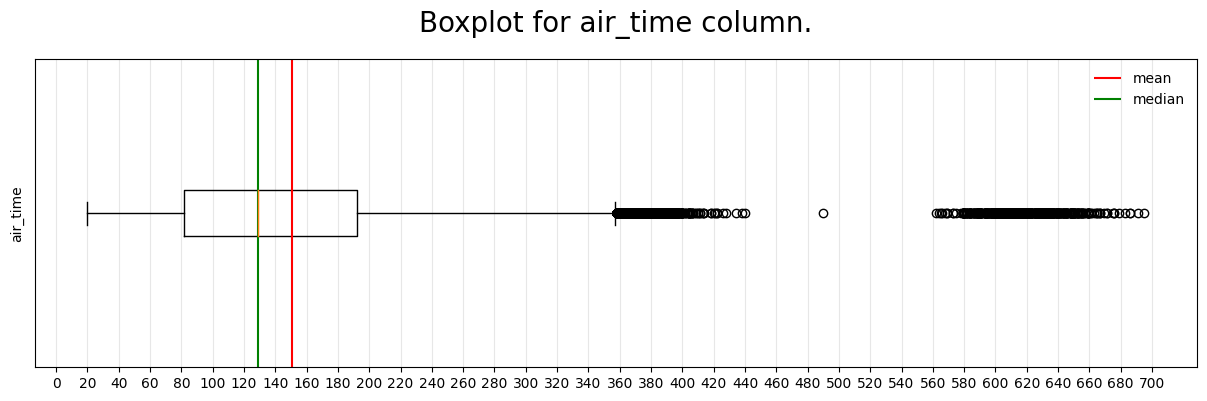

In [56]:
plt.figure(figsize=(15, 4))
plt.boxplot(df['air_time'], vert=False);
plt.grid(alpha=.3)
plt.title('Boxplot for air_time column.', size=20, pad=20)
plt.xticks(np.arange(0, df.air_time.max()+20, 20));
plt.ylabel('air_time')
plt.yticks([]);

# lets draw the mean and median
ymin, ymax = plt.gca().get_ylim()
plt.vlines(x=[_air_time_mean], ymin=ymin, ymax=ymax, color='red', label='mean')
plt.vlines(x=[_air_time_median], ymin=ymin, ymax=ymax, color='green', label='median')

# plot the legend
plt.legend(framealpha=.0);

Mode is specific in a way that it shows the most repetitive value in the data. When we are talking about nominal and ordinal variables, this is possible. However, doing this for a other types of variables is not possible. This is why we will use `mode` on a different example later. 

Let's try to view distribution of the `air_time` column.

Let's try putting both graphs in the same figure.

In [57]:
_air_time_mean = np.mean(df.air_time)
_air_time_median = np.median(df.air_time)

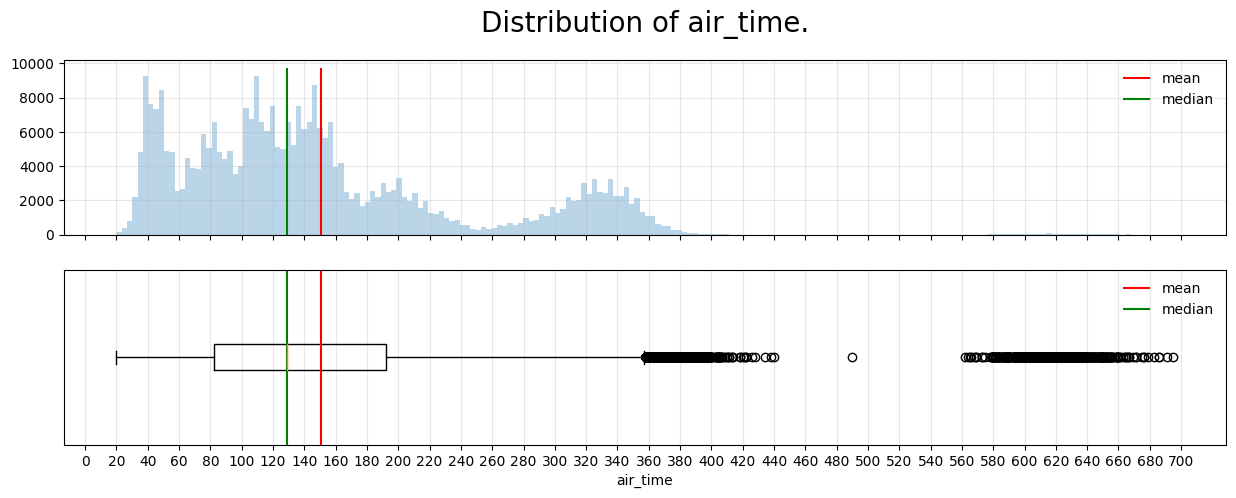

In [58]:
# we have to take figure and axes
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(15, 5), sharex=True)

# flatten for easier indexing
axes = axes.flatten()

# plotting first chart
axes[0].hist(df.air_time, bins=200, alpha=.3)
axes[0].set_title('Distribution of air_time.', size=20, pad=20)
axes[0].grid(alpha=.3)

ymin, ymax = axes[0].get_ylim()
axes[0].vlines(x=[_air_time_mean], ymin=ymin, ymax=ymax, color='red', label='mean')
axes[0].vlines(x=[_air_time_median], ymin=ymin, ymax=ymax, color='green', label='median')
axes[0].legend(framealpha=.0);

# plotting second chart
axes[1].boxplot(df['air_time'], vert=False);
axes[1].grid(alpha=.3)
axes[1].set_xlabel('air_time')
axes[1].set_xticks(np.arange(0, df.air_time.max()+20, 20));
axes[1].set_yticks([]);

ymin, ymax = axes[1].get_ylim()
axes[1].vlines(x=[_air_time_mean], ymin=ymin, ymax=ymax, color='red', label='mean')
axes[1].vlines(x=[_air_time_median], ymin=ymin, ymax=ymax, color='green', label='median')
axes[1].legend(framealpha=.0);

In [59]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00


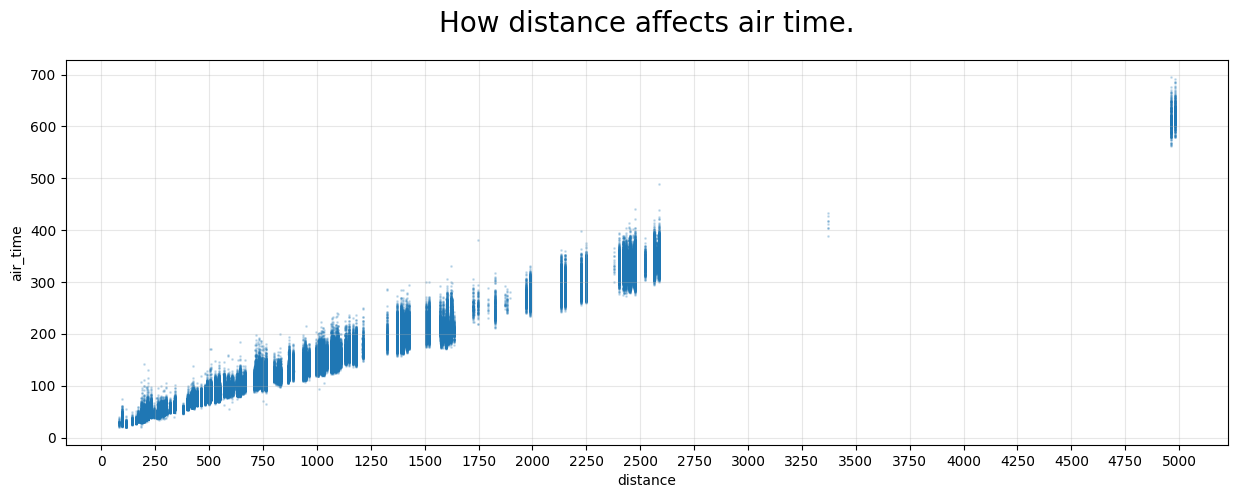

In [60]:
plt.figure(figsize=(15, 5))
plt.scatter(x=df.distance, y=df.air_time, s=1, alpha=.2)
plt.xlabel('distance')
plt.ylabel('air_time')
plt.title('How distance affects air time.', size=20, pad=20)
plt.grid(alpha=.3)
plt.xticks(np.arange(0, df.distance.max()+20, 250));


Who would say, distance between place of departure and arrival does affect the time in air!

Obviously there are some big distance flights. Shall we take a look at these?

In [61]:
df[df.distance > 4000]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
163,2013,1,1,857,900,-3,1516,1530,-14,HA,51,N380HA,JFK,HNL,659,4983,9,0,2013-01-01 09:00:00
380,2013,1,1,1344,1344,0,2005,1944,21,UA,15,N76065,EWR,HNL,656,4963,13,44,2013-01-01 13:00:00
1074,2013,1,2,909,900,9,1525,1530,-5,HA,51,N380HA,JFK,HNL,638,4983,9,0,2013-01-02 09:00:00
1294,2013,1,2,1344,1344,0,1940,1944,-4,UA,15,N77066,EWR,HNL,634,4963,13,44,2013-01-02 13:00:00
2019,2013,1,3,914,900,14,1504,1530,-26,HA,51,N380HA,JFK,HNL,616,4983,9,0,2013-01-03 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334537,2013,9,28,1327,1329,-2,1710,1813,-63,UA,15,N66057,EWR,HNL,562,4963,13,29,2013-09-28 13:00:00
335096,2013,9,29,957,1000,-3,1405,1445,-40,HA,51,N384HA,JFK,HNL,580,4983,10,0,2013-09-29 10:00:00
335302,2013,9,29,1420,1329,51,1817,1813,4,UA,15,N66057,EWR,HNL,569,4963,13,29,2013-09-29 13:00:00
336082,2013,9,30,959,1000,-1,1438,1445,-7,HA,51,N392HA,JFK,HNL,603,4983,10,0,2013-09-30 10:00:00


In [62]:
df[df.distance > 4000].apply(lambda x: 'HNL' in x['origin'] or 'HNL' in x['dest'], axis=1).all()

True

These flights are all to Honolulu or from Honoluly airport. Makes sense.

Let's see what is the distribution of flight times to and from HNL airport, if the other airport is JFK in NYC. 

First, let's see how many flights is there on this relation, grouped by the place of departure.

In [63]:
(df.groupby(['origin', 'dest'])['air_time']
   .count()
   .reset_index()
   .rename(columns={'air_time': 'no_of_flights'})
   .query('origin == "HNL" | dest == "HNL"'))

,origin,dest,no_of_flights
31,EWR,HNL,359
108,JFK,HNL,342


Strange, there is no flights departing from HNL airport. Okay, let's view the distribution of air time for flights from JFK to HNL.


In [64]:
_df = df.loc[(df.origin == 'JFK') & (df.dest == 'HNL')]

_df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
163,2013,1,1,857,900,-3,1516,1530,-14,HA,51,N380HA,JFK,HNL,659,4983,9,0,2013-01-01 09:00:00
1074,2013,1,2,909,900,9,1525,1530,-5,HA,51,N380HA,JFK,HNL,638,4983,9,0,2013-01-02 09:00:00
2019,2013,1,3,914,900,14,1504,1530,-26,HA,51,N380HA,JFK,HNL,616,4983,9,0,2013-01-03 09:00:00
2923,2013,1,4,900,900,0,1516,1530,-14,HA,51,N384HA,JFK,HNL,639,4983,9,0,2013-01-04 09:00:00
3792,2013,1,5,858,900,-2,1519,1530,-11,HA,51,N381HA,JFK,HNL,635,4983,9,0,2013-01-05 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331507,2013,9,25,1001,1000,1,1508,1445,23,HA,51,N389HA,JFK,HNL,636,4983,10,0,2013-09-25 10:00:00
333479,2013,9,27,951,1000,-9,1442,1445,-3,HA,51,N390HA,JFK,HNL,629,4983,10,0,2013-09-27 10:00:00
334407,2013,9,28,955,1000,-5,1412,1445,-33,HA,51,N391HA,JFK,HNL,584,4983,10,0,2013-09-28 10:00:00
335096,2013,9,29,957,1000,-3,1405,1445,-40,HA,51,N384HA,JFK,HNL,580,4983,10,0,2013-09-29 10:00:00


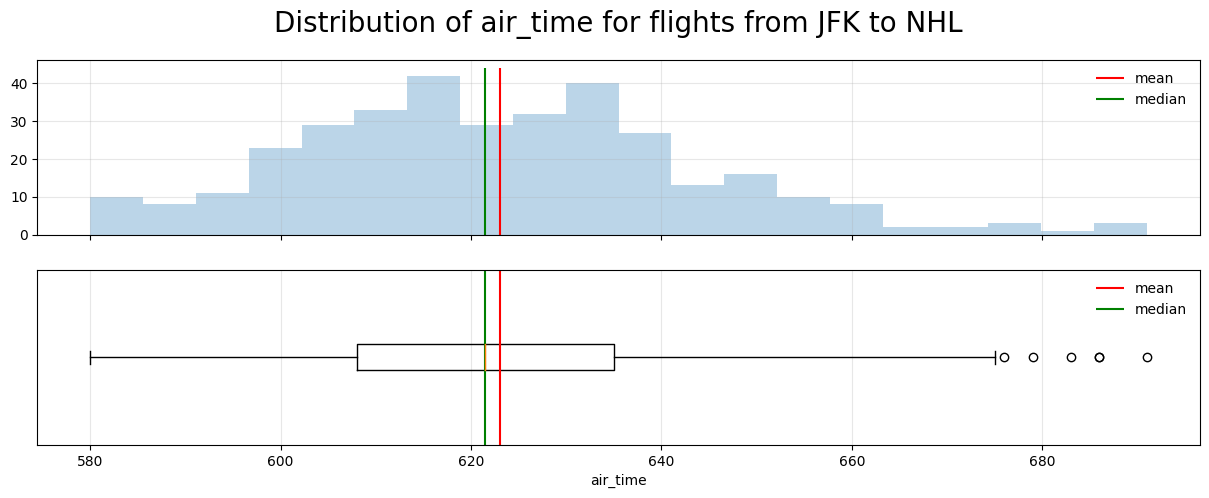

In [65]:
_air_time_mean = np.mean(_df.air_time)
_air_time_median = np.median(_df.air_time)

# we have to take figure and axes
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(15, 5), sharex=True)

# flatten for easier indexing
axes = axes.flatten()

# plotting first chart
axes[0].hist(_df.air_time, bins=20, alpha=.3)
axes[0].set_title('Distribution of air_time for flights from JFK to NHL', size=20, pad=20)
axes[0].grid(alpha=.3)

ymin, ymax = axes[0].get_ylim()
axes[0].vlines(x=[_air_time_mean], ymin=ymin, ymax=ymax, color='red', label='mean')
axes[0].vlines(x=[_air_time_median], ymin=ymin, ymax=ymax, color='green', label='median')
axes[0].legend(framealpha=.0);

# plotting second chart
axes[1].boxplot(_df.air_time, vert=False);
axes[1].grid(alpha=.3)
axes[1].set_xlabel('air_time')
axes[1].set_xticks(np.arange(0, df.air_time.max()+20, 20));
axes[1].set_yticks([]);

ymin, ymax = axes[1].get_ylim()
axes[1].vlines(x=[_air_time_mean], ymin=ymin, ymax=ymax, color='red', label='mean')
axes[1].vlines(x=[_air_time_median], ymin=ymin, ymax=ymax, color='green', label='median')
axes[1].legend(framealpha=.0);

Okay, so that' it, but can we check which carriers are having flights on this relation?

In [66]:
_df.carrier.value_counts()

HA    342
Name: carrier, dtype: Int64

Well, just one... the Hawaiian Airlines.

Here is another idea! Let's find top 10 fastest carriers.

Have in mind that distance is probably in miles, and air time is in minutes. This way we will get the **miles/minute** measure of speed. Not **miles/hour**.

We can convert our air time to hours. Let's do that.

In [67]:
df['speed'] = df.distance / (df.air_time / 60)

In [68]:
df.groupby('carrier')['speed'].describe()

,count,mean,std,min,25%,50%,75%,max
carrier,,,,,,,,
9E,17294.0,345.430398,65.081449,92.459016,305.228833,349.900990,392.666667,517.664234
AA,31947.0,417.472739,47.461814,116.875000,392.000000,423.045685,450.410959,556.457143
AS,709.0,443.678889,21.720863,367.653061,428.928571,444.814815,458.980892,520.288809
B6,54049.0,399.971468,64.904780,84.680851,352.000000,416.153846,448.439306,557.441860
DL,47658.0,418.462807,43.575184,123.296703,393.037975,423.776224,448.235294,703.384615
EV,51108.0,362.943626,52.243521,123.076923,328.000000,366.857143,401.447368,650.322581
F9,681.0,425.172111,27.778219,349.640288,406.694561,424.454148,445.871560,498.461538
FL,3175.0,394.358094,34.192364,280.235294,371.707317,394.137931,419.449541,531.627907
HA,342.0,480.357719,15.771798,432.677279,470.834646,481.062258,491.743421,515.482759


Well, to get top N of these, we would have to choose the metric by which we are sorting. How about we plot speed distribution for each of the carriers?

And, while we are trying to do this, let's try switching from using `matplotlib` to using `seaborn`!

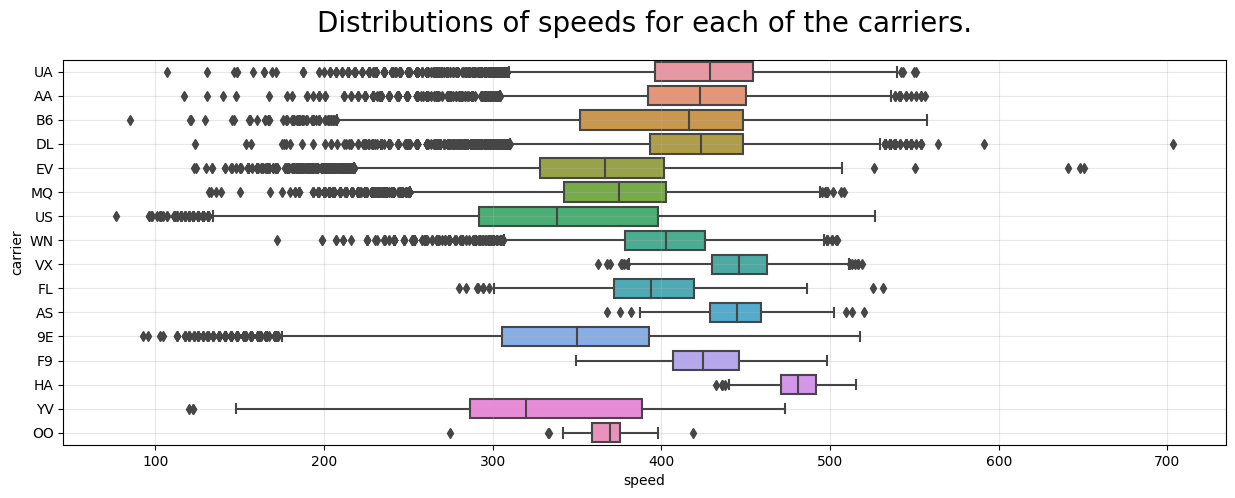

In [69]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='speed', y='carrier', data=df)
plt.title('Distributions of speeds for each of the carriers.', size=20, pad=20)
plt.grid(alpha=.3)

So, apparently HA carrier (our friends from Hawaiian Airlines) are the fastest on average. Could it be that longer flights are the "fastest" because the proportion of time waiting to take off and dock on the terminal is smaller in comparison to other flights with shorter distance?

Let's find out.

What do we need. Well, let's take the carrier that has the most flights in our data set. 

It is the UA carrier.

From what we can see, this carrier has a lot of "outliers" on the lower side. At least, this is what boxplot is detecting with it's IRQ rule. But nevertheless, UA holds one of the widest distribution in comparing to other carriers. This is probably because this carrier has a lot of departures from various airport pairs. 

Let's see if the distance between the airports where UA is having flights, is somehow affecting the speed of it's aircraft.

How do we want to do this? Well, we first have to make a histogram of distances, i.e. bin them somehow, and then do the boxplot for each bin. 

In [70]:
# a lot of flights
df[df.carrier == 'UA'].shape

(57782, 20)

Let's create helping dataframe that will contain only the data we are interested in.

In [71]:
_df = df.loc[(df.carrier == 'UA'), ['distance', 'speed']].copy().reset_index(drop=True)

In [72]:
_df

,distance,speed
0,1400,370.044053
1,1416,374.273128
2,719,287.6
3,2475,430.434783
4,2565,426.315789
...,...,...
57777,937,457.073171
57778,200,300.0
57779,1400,480.0
57780,200,324.324324


NumPy `histogram` method is able to create histogram for given array (distance). It returns values for each bin and bin edges. Bin edges array is just an array with increasing values where the bins are created.

In [73]:
_hist, _bin_edges = np.histogram(_df['distance'], bins=30)

In [74]:
_bin_edges

array([116.0, 277.56666666666666, 439.1333333333333, 600.7,
       762.2666666666667, 923.8333333333333, 1085.4, 1246.9666666666667,
       1408.5333333333333, 1570.1, 1731.6666666666665, 1893.2333333333333,
       2054.8, 2216.366666666667, 2377.9333333333334, 2539.5,
       2701.0666666666666, 2862.633333333333, 3024.2, 3185.7666666666664,
       3347.333333333333, 3508.9, 3670.4666666666667, 3832.0333333333333,
       3993.6, 4155.166666666666, 4316.733333333334, 4478.3,
       4639.866666666667, 4801.433333333333, 4963.0], dtype=object)

/home/ikacikac/workspace/dss03python2023/.venv/lib/python3.8/site-packages/seaborn/distributions.py:497: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/ikacikac/workspace/dss03python2023/.venv/lib/python3.8/site-packages/seaborn/distributions.py:498: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


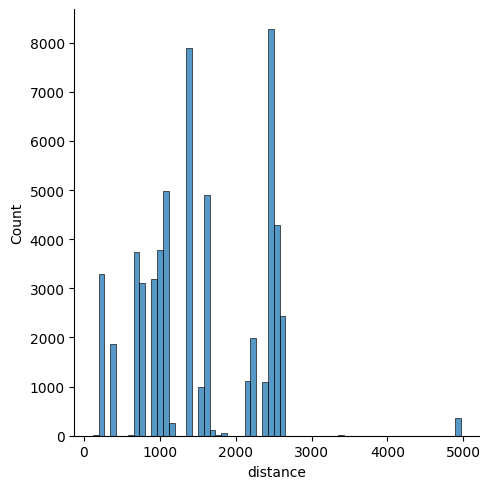

In [75]:
sns.displot(x='distance', data=_df)
sns.despine();

Pandas has the method that can be used to create Series that will hold the bin for each of the observations.

In [76]:
pd.cut(_df['distance'], _bin_edges)

0        (1246.967, 1408.533]
1          (1408.533, 1570.1]
2            (600.7, 762.267]
3          (2377.933, 2539.5]
4          (2539.5, 2701.067]
                 ...         
57777       (923.833, 1085.4]
57778        (116.0, 277.567]
57779    (1246.967, 1408.533]
57780        (116.0, 277.567]
57781      (2539.5, 2701.067]
Name: distance, Length: 57782, dtype: category
Categories (30, interval[float64, right]): [(116.0, 277.567] < (277.567, 439.133] < (439.133, 600.7] < (600.7, 762.267] ... (4316.733, 4478.3] < (4478.3, 4639.867] < (4639.867, 4801.433] < (4801.433, 4963.0]]

Additionally, we can select the left or right edge, right being inclusive, for easier interpretation, and create the series.

This is the new one, with the same index as the helping data frame, plus we are giving it a new name.

In [77]:
(pd.Series(pd.cut(_df['distance'], _bin_edges).apply(lambda x: x.right), 
           name='bin', 
           index=_df.index))

/home/ikacikac/workspace/dss03python2023/.venv/lib/python3.8/site-packages/IPython/lib/pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0        1408.533
1        1570.100
2         762.267
3        2539.500
4        2701.067
           ...   
57777    1085.400
57778     277.567
57779    1408.533
57780     277.567
57781    2701.067
Name: bin, Length: 57782, dtype: category
Categories (30, float64): [277.567 < 439.133 < 600.700 < 762.267 ... 4478.300 < 4639.867 < 4801.433 < 4963.000]

Okay, let's add this to the existing helping data frame. This is one of the ways to perform the 'merging', by concatenating. Other is by joining dataframes. More on that approach later.

In [78]:
_df1= pd.concat([
    _df, 
    pd.Series(pd.cut(_df['distance'], _bin_edges).apply(lambda x: x.right), 
              name='bin', 
              index=_df.index)
], axis=1)

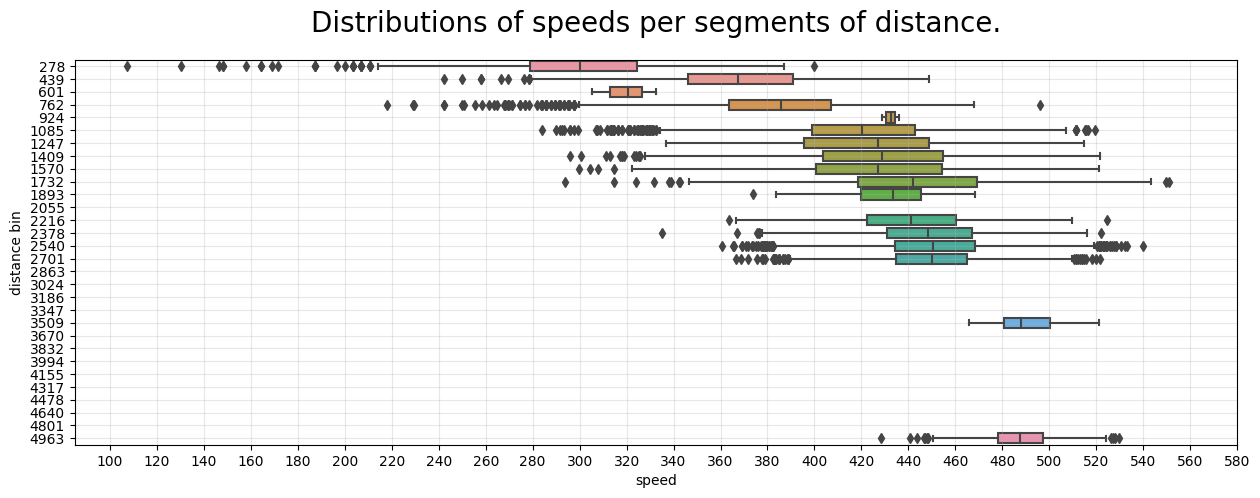

In [79]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(x='speed', y='bin', data=_df1, ax=ax)

plt.ylabel('distance bin')
ax.set_title('Distributions of speeds per segments of distance.', size=20, pad=20);

ax.set_xticks(list(range(100, 600, 20)))

_y_tick_labels = [x.get_text() for x in ax.get_yticklabels()]
ax.set_yticklabels([f'{float(x):.0f}' for x in _y_tick_labels]);

plt.grid(alpha=.3)

Well, in general it seems that the greater the distance the greater the speed is. Makes sense!

### Bonus

At the beginning we have shown the graphical representation of the missing values. But how did we do it?

There is a `seaborn` method called `heatmap`. It takes tabular data and creates a graphical representation of this table, but instead of showing the values it colors the cell based on this values.

When checking for the missing values in the dataset, we can call Pandas DataFrame method `isna`, which gives us the table of the same dimensions but but boolean values instead of original ones. `True` is the value of the cell which has the missing values.

This way we are able to use `seaborn` `heatmap` to represent this table of booleans in appealing way.

Let's see how we can do this.

We will load the data once again, because we need the original one that had missing values. 

In [80]:
df = pd.read_csv('_data/flights.csv', index_col=0)

df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


Let's make a list of column names where we have missing values.

First get the list of all columns and number of missing values per each.

In [81]:
 df.isna().sum().sort_values(ascending=False)

arr_delay         9430
air_time          9430
arr_time          8713
dep_time          8255
dep_delay         8255
tailnum           2512
year                 0
origin               0
minute               0
hour                 0
distance             0
dest                 0
carrier              0
flight               0
month                0
sched_arr_time       0
sched_dep_time       0
day                  0
time_hour            0
dtype: int64

Then we want to sort them in decreasing order and take only those columns that have missing values.

In [82]:
(df.isna()
   .sum()
   .sort_values(ascending=False)
   .where(lambda x: x > 0)
   .dropna())

arr_delay    9430.0
air_time     9430.0
arr_time     8713.0
dep_time     8255.0
dep_delay    8255.0
tailnum      2512.0
dtype: float64

After that we want to store this as a list of column names.

In [83]:
null_columns =  (df.isna()
                   .sum()
                   .sort_values(ascending=False)
                   .where(lambda x: x > 0)
                   .dropna()
                   .index.to_list())

In the end, we create the `heatmap` with this 

Before plotting the `heatmap` here is how the table of booleans looks like. Pay attention, it is transposed!

In [84]:
df[null_columns].isna().sort_values(by=null_columns, ascending=False).T

,1783,1785,2698,2699,3609,3610,4333,6099,6998,7896,...,336761,336762,336763,336764,336765,336766,336767,336768,336769,336770
arr_delay,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
air_time,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
arr_time,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
dep_time,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
dep_delay,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
tailnum,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


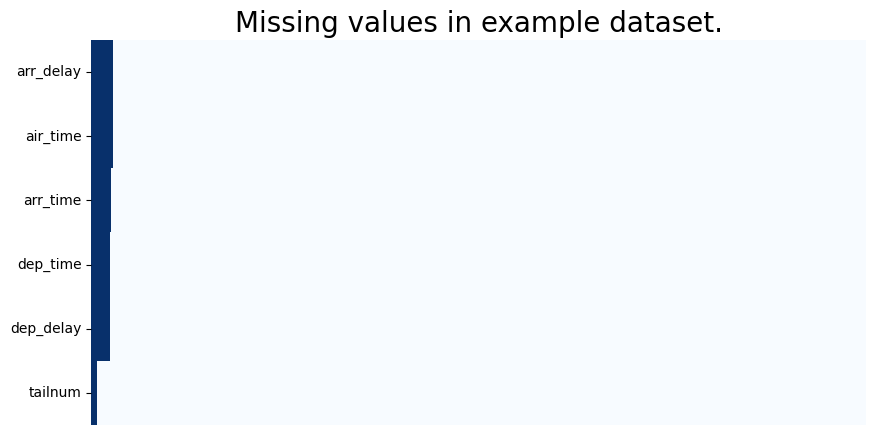

In [85]:
fig, ax = plt.subplots(figsize=(10, 5))

# changing the color mapping
rocket_cmap = sns.color_palette("Blues", as_cmap=True)

sns.heatmap(df[null_columns].isna().sort_values(by=null_columns, ascending=False).T, 
            cbar=False,  # disabling color bar on the right
            cmap=rocket_cmap, # setting the new color mapping
            ax=ax # one of the ways how we can explicitly set the destination axis
) 

sns.despine(bottom=True, left=True) # removing all of the spines
ax.set_xticks([])
ax.set_title('Missing values in example dataset.', size=20);

### Readings and Videos
- [Matplotlib - Quick start guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)
- [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)
- [Visualizing Missing Data with Seaborn Heatmap and Displot](https://datavizpyr.com/visualizing-missing-data-with-seaborn-heatmap-and-displot/)

### A highly recommended To Do
- [Bill Lubanovic, Introducing Python, 1st Edition](https://www.oreilly.com/library/view/introducing-python-2nd/9781492051374/), Chapter 13. Calendars and Clocks. 

<hr>

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: [GPLv3](https://www.gnu.org/licenses/gpl-3.0.txt) This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see http://www.gnu.org/licenses/.</font>